In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('log_1.csv')
df = df[df["time"] < 2]

df.to_csv('multi_data_real.csv', index=False)

In [6]:
df = pd.read_csv('log_1.csv')

objects = pd.DataFrame(columns=["id", "numpoints", "xpos", "ypos", "tlx", "tly", "brx", "bry"])
tt = 2
data = df[df["time"]<tt]

df2 = pd.read_csv('objects.csv')

obs = df2[df2["time"]<tt]


fig = plt.figure()
ax = fig.add_subplot(111)

ax.scatter(data['x'], data['y'])


unique_times = []
for _, obj in obs.iterrows():
	unique_times.append(obj['id'])
    tlx = obj['tlx']
    tly = obj['tly']
    brx = obj['brx']
    bry = obj['bry']
    ax.plot([tlx, brx], [tly, tly], color='blue')
    ax.plot([brx, brx], [tly, bry], color='blue')
    ax.plot([brx, tlx], [bry, bry], color='blue')
    ax.plot([tlx, tlx], [bry, tly], color='blue')
    xpos = obj['xpos']
    ypos = obj['ypos']
    ax.plot(xpos, ypos, 'b+')

    

ax.set_xlim(-5, 25)
ax.set_ylim(-5, 25)

# Create legend labels and handles
legend_labels = ['{}'.format(t) for t in unique_times]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=plt.cm.viridis(t/unique_times[-1]), markersize=10) for t in unique_times]


# Add legend
ax.legend(legend_handles, legend_labels, title='Label')

plt.show()

,time,x,y,intensity
0,1.234739,-0.000000e+00,-0.000000,0.933333
1,1.234739,-4.268690e-09,-0.097656,0.933333
2,1.234739,-8.537381e-09,-0.195312,0.933333
3,1.234739,-1.280607e-08,-0.292969,0.933333
4,1.234739,-1.707476e-08,-0.390625,0.933333
...,...,...,...,...
127380,1.234739,8.479235e-02,-27.636590,0.466667
127381,1.234739,8.509196e-02,-27.734245,0.466667
127382,1.234739,8.539158e-02,-27.831900,0.403922
127383,1.234739,8.569121e-02,-27.929556,0.203922


In [6]:
df = pd.read_csv('logs/log_1.csv')
df = df[(df["time"] < 7) & (df["time"] > 6)]


In [30]:
df

,time,x,y,intensity
647549,6.4165,-0.000000e+00,-0.000000,0.933333
647550,6.4165,-4.268690e-09,-0.097656,0.933333
647551,6.4165,-8.537381e-09,-0.195312,0.933333
647552,6.4165,-1.280607e-08,-0.292969,0.933333
647553,6.4165,-1.707476e-08,-0.390625,0.933333
...,...,...,...,...
775655,6.4165,8.688968e-02,-28.320179,0.600000
775656,6.4165,8.718930e-02,-28.417835,0.600000
775657,6.4165,8.748892e-02,-28.515491,0.474510
775658,6.4165,8.778854e-02,-28.613146,0.270588


In [7]:

N = 10000
sdf = df.sample(n=N)
#sdf = sdf[(df["x"]>40)]
sdf


,time,x,y,intensity
685490,6.4165,-12.205399,13.975143,1.000000
712982,6.4165,4.711147,28.717695,0.266667
771769,6.4165,0.227855,-0.317285,0.933333
761376,6.4165,19.451117,-4.305249,1.000000
775119,6.4165,0.040442,-1.464285,0.933333
...,...,...,...,...
656039,6.4165,-16.092762,-7.311379,0.400000
648443,6.4165,-1.016293,-25.468012,1.000000
726221,6.4165,3.569967,5.714873,1.000000
690786,6.4165,-8.202602,12.953320,0.333333


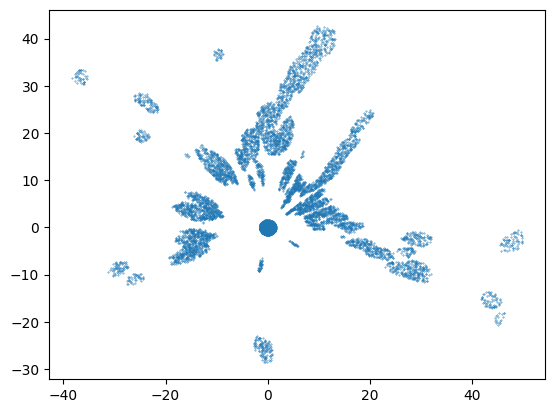

In [8]:

plt.scatter(sdf['x'], sdf['y'], s=0.1)
plt.show()

In [9]:
from sklearn.cluster import DBSCAN, KMeans
from hdbscan import HDBSCAN

import numpy as np
import cv2

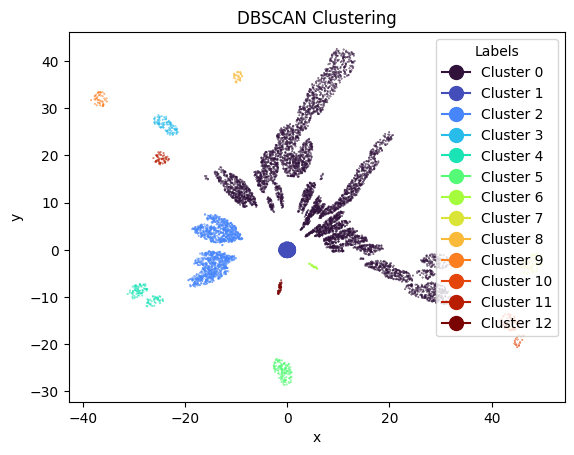

In [20]:
# Perform DBSCAN clustering
eps = 3
min_samples = 15
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
clusters = dbscan.fit_predict(sdf[['x', 'y']])

# Plot the clusters
scatter = plt.scatter(sdf['x'], sdf['y'], c=clusters, cmap='turbo', s=0.1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN Clustering')

# Create legend labels and handles
unique_labels = np.unique(clusters)
legend_labels = ['Cluster {}'.format(label) for label in unique_labels]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]

# Add legend
plt.legend(legend_handles, legend_labels, title='Labels')

plt.show()


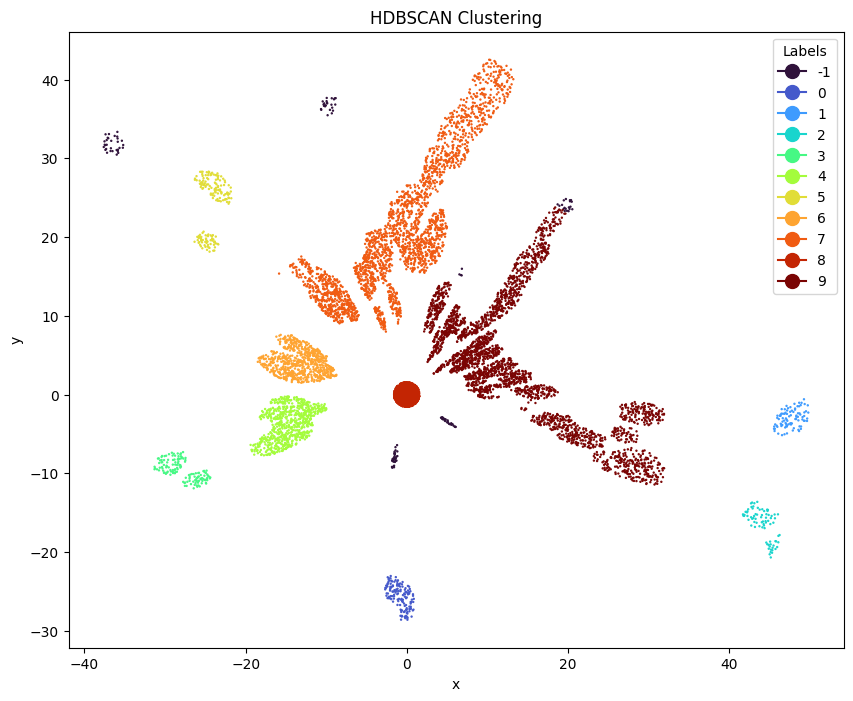

In [44]:
# Perform DBSCAN clustering
eps = 3
min_samples = 5
dbscan = HDBSCAN(min_cluster_size=30*2)
clusters = dbscan.fit_predict(sdf[['x', 'y']])

# Create a larger figure
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the clusters
scatter = ax.scatter(sdf['x'], sdf['y'], c=clusters, cmap='turbo', s=0.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('HDBSCAN Clustering')

# Create legend labels and handles
unique_labels = np.unique(clusters)
legend_labels = ['{}'.format(label) for label in unique_labels]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]

# Add legend
ax.legend(legend_handles, legend_labels, title='Labels')

plt.show()

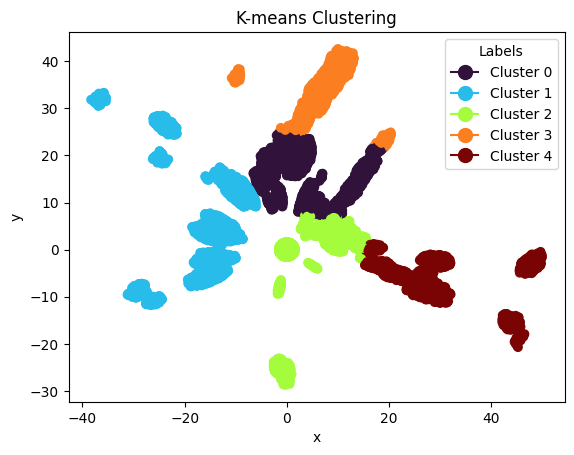

In [32]:
# Perform K-means clustering
k = 5
kmeans = KMeans(n_clusters=k)
clusters = kmeans.fit_predict(sdf[['x', 'y']])

# Plot the clusters
scatter = plt.scatter(sdf['x'], sdf['y'], c=clusters, cmap='turbo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-means Clustering')

# Create legend labels and handles
unique_labels = np.unique(clusters)
legend_labels = ['Cluster {}'.format(label) for label in unique_labels]

# Create legend handles
legend_handles = [plt.Line2D([0], [0], marker='o', color=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_labels]

# Add legend
plt.legend(legend_handles, legend_labels, title='Labels')

plt.show()


In [49]:
def grid_based_clustering(sdf, n, r, p):
	# Calculate the size of each grid box
	grid_size = 2 * r / n

	# Create an empty grid
	grid = np.zeros((n, n), dtype=int)

	# Iterate through the data points
	for _, point in sdf.iterrows():
		x, y = point['x'], point['y']

		# Calculate the grid box indices for the point
		i = int((x + r) // grid_size)
		j = int((y + r) // grid_size)

		# Check if the grid box indices are within the valid range
		if i >= n:
			i = n - 1
		if j >= n:
			j = n - 1

		# Increment the count in the corresponding grid box
		grid[i, j] += 1

	# Initialize the cluster labels
	labels = np.zeros(len(sdf), dtype=int)

	# Initialize the cluster index
	cluster_index = 1

	# Iterate through the grid boxes
	for i in range(n):
		for j in range(n):
			# Check if the grid box has enough points
			if grid[i, j] >= p:
				# Assign the current cluster index to the points in the grid box
				mask = ((sdf['x'] >= i * grid_size - r) & (sdf['x'] < (i + 1) * grid_size - r) &
						(sdf['y'] >= j * grid_size - r) & (sdf['y'] < (j + 1) * grid_size - r))
				labels[mask] = cluster_index

				# Check adjacent grid boxes
				if i > 0 and labels[((i - 1) * n + j)] != 0:
					labels[mask] = labels[((i - 1) * n + j)]
				elif j > 0 and labels[(i * n + (j - 1))] != 0:
					labels[mask] = labels[(i * n + (j - 1))]
				else:
					cluster_index += 1

	return labels

# Example usage
n = 200  # Number of rows and columns in the grid
r = 50  # Range within which the actual data lies
p = 2  # Threshold for the number of points in a grid box

labels = grid_based_clustering(sdf, n, r, p)

# Plot the clusters
scatter = plt.scatter(sdf['x'], sdf['y'], c=labels, cmap='turbo', s=0.1)


IndexError: index 10076 is out of bounds for axis 0 with size 10000

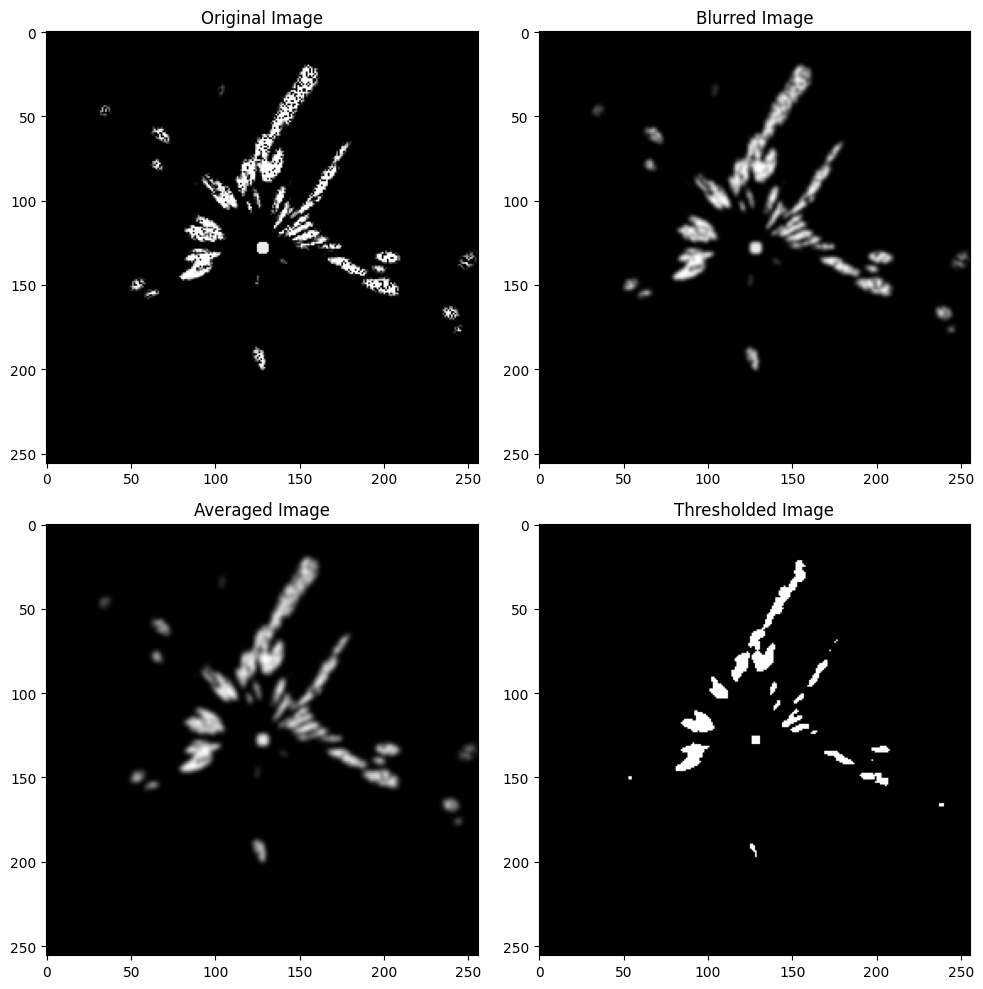

In [43]:

w = 128*2
h = 128*2
r = 50
# Create a blank image with size 1000x1000
image = np.zeros((w, h), dtype=np.uint8)

# Iterate through the xy points and increment the corresponding pixel value
for x, y, ins in zip(sdf['x'], sdf['y'], sdf['intensity']):
	ix = w//2 + int(w//2*(x/r))
	iy = h//2 - int(h//2*(y/r))
	image[iy, ix] = ins*255


# Apply Gaussian blur to the image
kernel_size = 5 # dependent on image size
blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Apply averaging with a 3x3 window
averaged_image = cv2.blur(blurred_image, (3, 3))

# Threshold the image with a threshold value of 0.3 of the maximum intensity
int_thresh = 0.1 # dependent on the amount of points
_, thresholded_image = cv2.threshold(averaged_image, 0.6 * np.max(averaged_image), 255, cv2.THRESH_BINARY)

# Show the thresholded image
# cv2.imshow('Thresholded Image', thresholded_image)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

#plt.imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
# Create a figure with a 2x2 grid of subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the original image
axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].set_title('Original Image')

# Plot the blurred image
axs[0, 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
axs[0, 1].set_title('Blurred Image')

# Plot the averaged image
axs[1, 0].imshow(cv2.cvtColor(averaged_image, cv2.COLOR_BGR2RGB))
axs[1, 0].set_title('Averaged Image')

# Plot the thresholded image
axs[1, 1].imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
axs[1, 1].set_title('Thresholded Image')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

In [50]:
import os

# Specify the folder path to save the file
folder_path = '/Users/hugodrak/Documents/chalmers/1_kandarb_EENX16/CASE/cpp_playground/cv2_images'

# Create the folder if it doesn't exist
if not os.path.exists(folder_path):
	os.makedirs(folder_path)

df = pd.read_csv('logs/log_3.csv')
N = 10000
w = 128*2
h = 128*2
r = 50

for t in range(85,115):
	df2 = df[(df["time"] < t+1) & (df["time"] > t)]
	if df2.empty:
		continue

	sdf = df.sample(n=N)

	# Set the top title
	top_title = f'Time: {t}s'

	# Create a blank image with size 1000x1000
	image = np.zeros((w, h), dtype=np.uint8)

	# Iterate through the xy points and increment the corresponding pixel value
	for x, y, ins in zip(sdf['x'], sdf['y'], sdf['intensity']):
		ix = w//2 + int(w//2*(x/r))
		iy = h//2 - int(h//2*(y/r))
		image[iy, ix] = ins*255

	# Apply Gaussian blur to the image
	kernel_size = 5 # dependent on image size
	blurred_image = cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

	# Apply averaging with a 3x3 window
	averaged_image = cv2.blur(blurred_image, (3, 3))

	# Threshold the image with a threshold value of 0.3 of the maximum intensity
	int_thresh = 0.1 # dependent on the amount of points
	_, thresholded_image = cv2.threshold(averaged_image, 0.6 * np.max(averaged_image), 255, cv2.THRESH_BINARY)

	# Create a figure with a 2x2 grid of subplots
	fig, axs = plt.subplots(2, 2, figsize=(10, 10))

	# Set the top title
	fig.suptitle(top_title, fontsize=16)

	# Plot the original image
	axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
	axs[0, 0].set_title('Original Image')

	# Plot the blurred image
	axs[0, 1].imshow(cv2.cvtColor(blurred_image, cv2.COLOR_BGR2RGB))
	axs[0, 1].set_title('Blurred Image')

	# Plot the averaged image
	axs[1, 0].imshow(cv2.cvtColor(averaged_image, cv2.COLOR_BGR2RGB))
	axs[1, 0].set_title('Averaged Image')

	# Plot the thresholded image
	axs[1, 1].imshow(cv2.cvtColor(thresholded_image, cv2.COLOR_BGR2RGB))
	axs[1, 1].set_title('Thresholded Image')

	# Adjust the spacing between subplots
	plt.tight_layout()

	# Save the plot in the specified folder
	file_path = os.path.join(folder_path, f't_{t}.png')
	plt.savefig(file_path)
	plt.close()
	print(f"t:{t}")

t:96
t:97
t:98
t:99
t:100
t:101
t:102
t:103
t:104
t:105
t:106
t:107
t:108
t:109
t:111
t:112
t:113
t:114


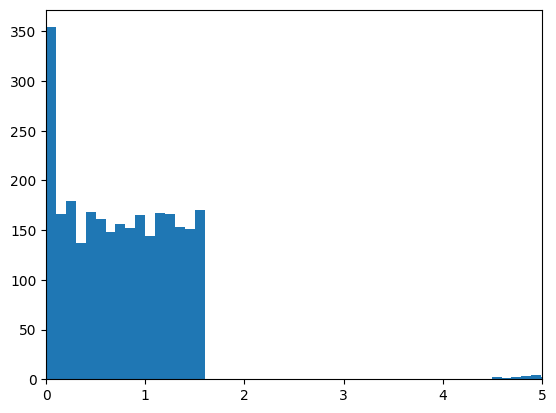

In [22]:
sdf["dist"] = np.sqrt(sdf["x"]**2 + sdf["y"]**2)

plt.hist(sdf["dist"], bins=500)
plt.xlim(0,5)
plt.show()